# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


In [ ]:
# Load the dataset
url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/diabetes.csv'
diabetesDF = pd.read_csv(url)

In [ ]:
features_for_clustering = diabetesDF.drop('Outcome', axis=1)

scaler = StandardScaler()
dataClust = scaler.fit_transform(features_for_clustering)

Features for clustering are selected (all columns except 'Outcome').
The data is standardized using StandardScaler to ensure features have equal weight during clustering.

In [ ]:
def visualize_clusters(dataClust, cluster_labels, algorithm_name):
    pca = PCA(n_components=2)
    dataClust_pca = pca.fit_transform(dataClust)

    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    scatter = plt.scatter(dataClust_pca[:, 0], dataClust_pca[:, 1],
                          c=cluster_labels, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering - PCA Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    tsne = TSNE(n_components=2, random_state=42)
    dataClust_tsne = tsne.fit_transform(dataClust)

    plt.subplot(122)
    scatter = plt.scatter(dataClust_tsne[:, 0], dataClust_tsne[:, 1],
                          c=cluster_labels, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering - t-SNE Visualization')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

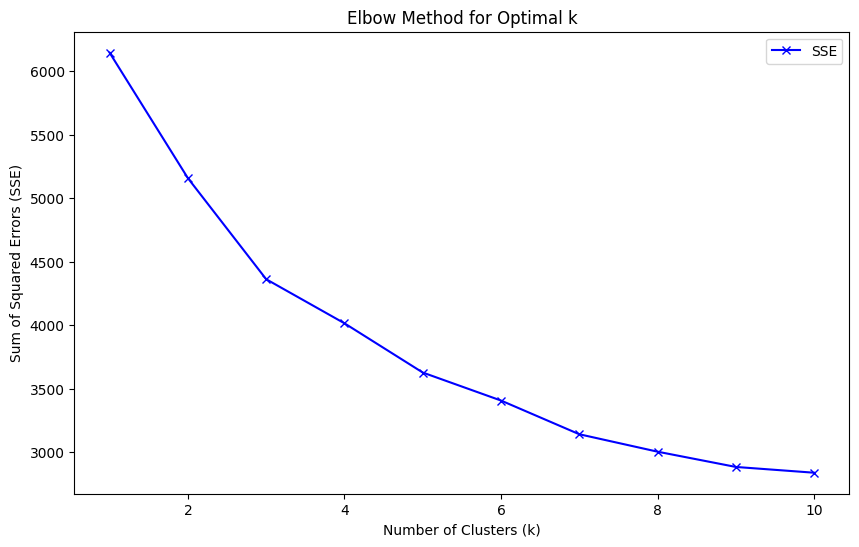

In [ ]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataClust)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-', label='SSE')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()


 K-Means Clustering:

Elbow Method: I use the elbow method to find the optimal number of clusters (k) for K-Means. It calculates the sum of squared errors (SSE) for different values of k and plots them. The "elbow" point in the plot suggests an optimal k value.
Clustering: K-Means is applied with the chosen k value to cluster the data. This helps understand the differences between clusters

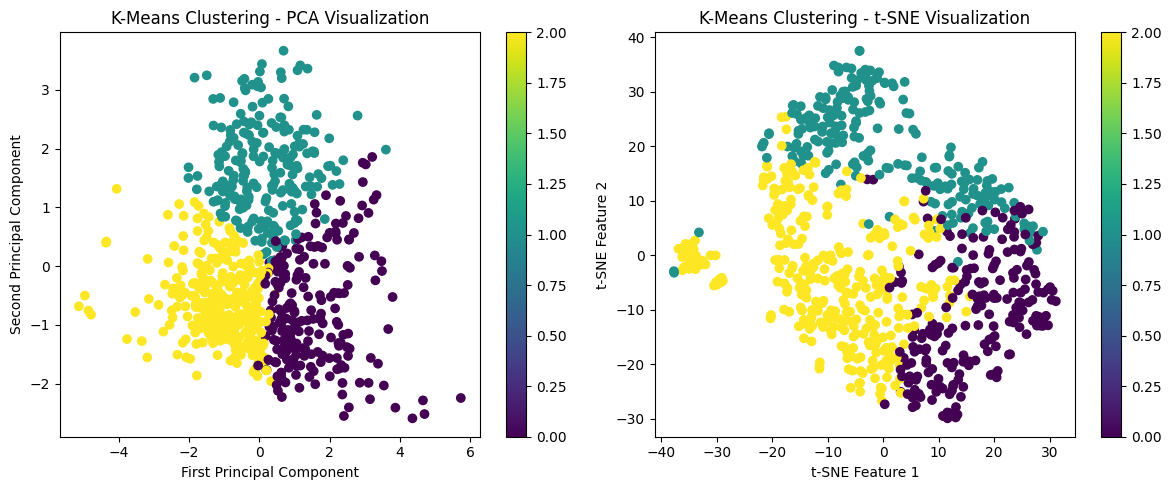


K-Means Clustering Results:
Cluster 0:
  Number of elements: 213
  Cluster Center: [-0.26489422  0.64628823  0.26298746  0.89342852  1.02126799  0.63208219
  0.41176195 -0.12515833]
Cluster 1:
  Number of elements: 221
  Cluster Center: [ 1.01888184  0.23526795  0.40087778 -0.48012719 -0.45255901  0.02379893
 -0.10364969  1.06754881]
Cluster 2:
  Number of elements: 334
  Cluster Center: [-0.50524078 -0.56782518 -0.43296503 -0.25207235 -0.35183994 -0.41884153
 -0.19400813 -0.62655557]


In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(dataClust)

visualize_clusters(dataClust, cluster_labels, 'K-Means')

cluster_centers = kmeans.cluster_centers_

print("\nK-Means Clustering Results:")
for i in range(k):
    cluster_size = np.sum(cluster_labels == i)
    print(f"Cluster {i}:")
    print(f"  Number of elements: {cluster_size}")
    print(f"  Cluster Center: {cluster_centers[i]}")

The clusters are visualized using PCA and t-SNE for dimensionality reduction, showing the data points grouped into clusters.


In [ ]:
diabetesDF_clustered = diabetesDF.copy()
diabetesDF_clustered['Cluster'] = cluster_labels

In [ ]:
cluster_analysis = diabetesDF_clustered.groupby('Cluster').mean()
print("\nCluster Center Analysis (Original Scale):")
print(cluster_analysis)



Cluster Center Analysis (Original Scale):
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           2.953052  141.544601      74.192488      34.779343  197.417840   
1           7.276018  128.411765      76.859729      12.882353   27.678733   
2           2.143713  102.751497      60.730539      16.517964   39.278443   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                            
0        36.972770                  0.608216  31.769953  0.535211  
1        32.180090                  0.437557  45.787330  0.488688  
2        28.692515                  0.407638  25.877246  0.137725  


Cluster Analysis: i analyzes the characteristics of each cluster by calculating the average values of features within each cluster. This helps understand the differences between clusters.

<Figure size 640x480 with 0 Axes>

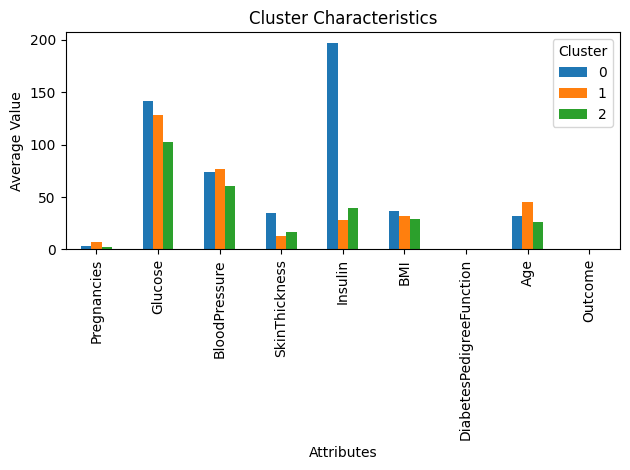

In [ ]:
plt.figure()
cluster_analysis.T.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.xlabel('Attributes')
plt.ylabel('Average Value')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Gaussian Mixture Model (GMM) Clustering:

GMM Clustering: GMM is applied to the data, providing an alternative clustering approach.
The GMM clusters are visualized using a scatter plot with different colors representing each cluster.
Cluster Analysis: I prints the number of elements in each GMM cluster.

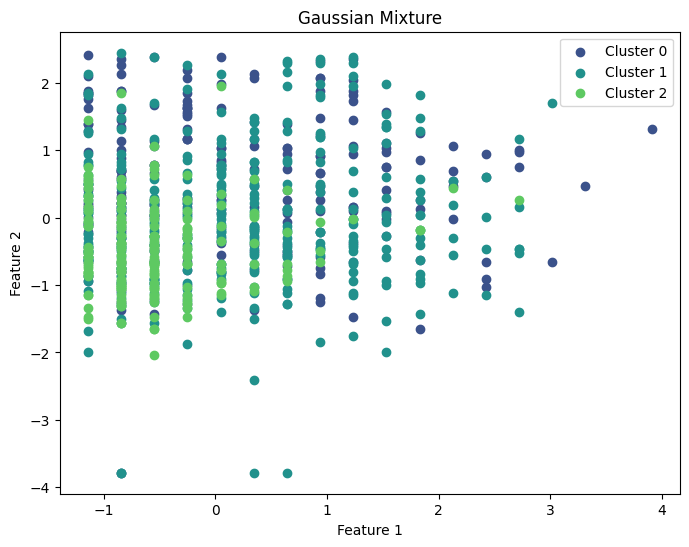


Gaussian Mixture Clustering Results:
Cluster 0:
  Number of elements: 229
Cluster 1:
  Number of elements: 341
Cluster 2:
  Number of elements: 198


In [ ]:


# Assuming dataClust is your data and k is the number of clusters
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(dataClust)

# Updated visualization with a different color palette
def visualize_clusters(data, labels, title):
    # Use a different palette, here we use 'viridis' for example
    palette = sns.color_palette("viridis", n_colors=k)

    plt.figure(figsize=(8, 6))
    for i in range(k):
        # Plot each cluster in a unique color from the palette
        plt.scatter(data[labels == i, 0], data[labels == i, 1],
                    color=palette[i], label=f'Cluster {i}')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Visualizing the clusters with the new palette
visualize_clusters(dataClust, gmm_labels, 'Gaussian Mixture')

# Print clustering results
print("\nGaussian Mixture Clustering Results:")
for i in range(k):
    cluster_size = np.sum(gmm_labels == i)
    print(f"Cluster {i}:")
    print(f"  Number of elements: {cluster_size}")


Pairplot Visualization:

A pairplot is created using Seaborn to visualize the relationships between all pairs of features in the dataset, colored by cluster assignments. This helps understand the distribution of data points and their cluster memberships.

In [25]:
plt.figure(figsize=(16, 12))
sns.pairplot(diabetesDF_clustered, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Diabetes Dataset with Cluster Coloring', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Comments

>

- **Feature Importance:**  
  Feature Importance:
The clustering analysis reveals that features such as Glucose levels, Insulin levels, and Body Mass Index (BMI) play a critical role in defining the clusters. These variables are particularly influential in differentiating the groups of patients and thus can be considered as key drivers in the clustering structure. The features have higher predictive power for understanding the distribution of diabetes-related risk factors. By identifying these features as significant, researchers and data scientists can focus on these variables to refine predictive models, ultimately improving the accuracy of diabetes diagnosis and prognosis.

  **Patient Stratification:**  
The clusters identified through this analysis represent distinct profiles of patients, segmented based on their health data. These groupings can be used for patient stratification, where individuals are categorized into specific risk groups with similar characteristics.The algorithm discovers natural groupings without prior labels. For healthcare providers, these clusters can guide the development of personalized treatment strategies, allowing interventions to be tailored based on an individual's risk factors, improving both prevention and care strategies for diabetes.

- **Risk Assessment:**  
 The clusters exhibit notable differences in features such as Glucose, Insulin, and BMI levels, which are commonly associated with diabetes risk. This suggests that clustering can be a valuable tool in risk assessment models.We can leverage these findings to create more refined models that assess the likelihood of a patient developing diabetes based on their cluster membership. For example, patients in clusters showing elevated Glucose and Insulin levels may be considered at higher risk (e.g., Cluster 2). These patients could be flagged for more intensive monitoring and interventions, helping to mitigate the risk and improve outcomes through timely actions

